Практика. Autoencoder

В практической части к текущему модулю рассмотрим, как закодировать некоторые специальные архитектуры в таких нейронных сетях, как:

автоэнкодеры;
вариационные автоэнкодеры;
генеративные состязательные сети.
Видео № 1

Для начала вспомним, как работает автоэнкодер.



Импортируем библиотеки и запускаем dataset MNIST.
Конструируем свой автоэнкодер, который будет состоять из двух подсетей: Encoder 'а и Decoder'а. Используем keras.Sequential, задаём список слоёв, прибив изначально по 2 пикселя со всех сторон.
Перейдём к обучению автоэнкодера. В качестве входа и выхода подаём одни и те же данные.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M

print(tf.__version__)

2.16.2


In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)

(60000, 28, 28, 1) float32
(10000, 28, 28, 1) float32


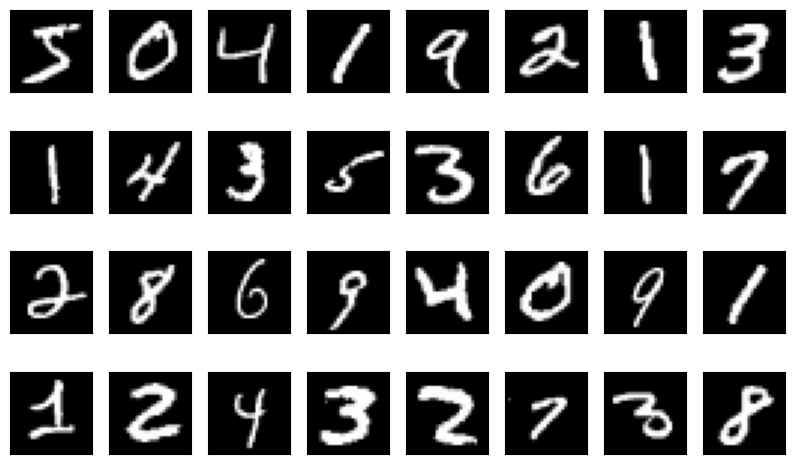

In [3]:
def plot_digits(samples):
    fig = plt.figure(figsize=(10, 6))
    num = samples.shape[0]
    for j in range(num):
        ax = fig.add_subplot(4, 8, j+1)
        ax.imshow(samples[j,:,:,0], cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()
    
plot_digits(train_x[:32, ...])

In [4]:
train_x.shape[1:]

(28, 28, 1)

In [5]:
encoder = M.Sequential([
    #L.ZeroPadding2D((2, 2)),
    L.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=train_x.shape[1:]),
    L.MaxPooling2D((2, 2), padding='same'),
    L.Conv2D(8, (3, 3), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), padding='same'),
    L.Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'),
    # Flatten encoding for visualization
    L.Flatten(),
    L.Reshape((4, 4, 8)),
])

decoder = M.Sequential([
    L.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(4, 4, 8)),
    L.UpSampling2D((2, 2)),
    L.Conv2D(8, (3, 3), padding='same', activation='relu'),
    L.UpSampling2D((2, 2)),
    L.Conv2D(8, (3, 3), padding='same', activation='relu'),
    L.UpSampling2D((2, 2)),
    L.Conv2D(1, (3, 3), padding='same', activation='sigmoid'),
    L.Cropping2D((2, 2))
])

autoencoder = M.Sequential([encoder, decoder])

autoencoder.compile(optimizer='RMSprop', loss='mse')

/Users/apple/python/SkillFactory/Ml_learning/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-10 22:47:12.077027: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-03-10 22:47:12.077062: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-10 22:47:12.077072: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-10 22:47:12.077092: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-10 22:47:12.077105: I tensorflow/core/common_runtime/pluggable_device/plu

In [6]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 4, 4, 8)        │         1,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │         1,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
NUM_EPOCHS = 25
BATCH_SIZE = 128

In [8]:
autoencoder.fit(train_x, train_x,
                epochs=NUM_EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True,
                validation_data=(test_x, test_x))

Epoch 1/25


2025-03-10 22:47:29.571565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 269ms/step - loss: 0.0875 - val_loss: 0.0345
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - loss: 0.0340 - val_loss: 0.0274
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 268ms/step - loss: 0.0278 - val_loss: 0.0238
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 126s 268ms/step - loss: 0.0237 - val_loss: 0.0212
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - loss: 0.0213 - val_loss: 0.0212
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - loss: 0.0196 - val_loss: 0.0178
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - loss: 0.0183 - val_loss: 0.0188
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - loss: 0.0173 - val_loss: 0.0177
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - loss: 0.0164 - val_loss: 0.0164
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - loss: 0.0158 - val_loss: 0.0146
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - loss: 0.0152 - val_loss: 0.0145
Epoch 12/25
469/469

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


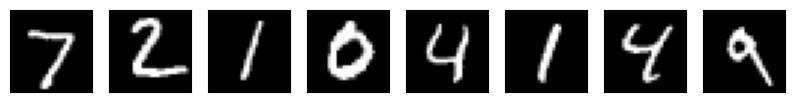

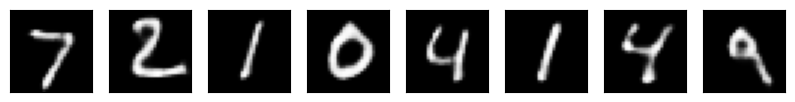

In [9]:
text_x_pred = autoencoder.predict(test_x[0:8])

plot_digits(test_x[0:8])
plot_digits(text_x_pred)

In [10]:
num_images = 10
random_test_images = np.random.randint(test_x.shape[0], size=num_images)

encoded_imgs = encoder.predict(test_x)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


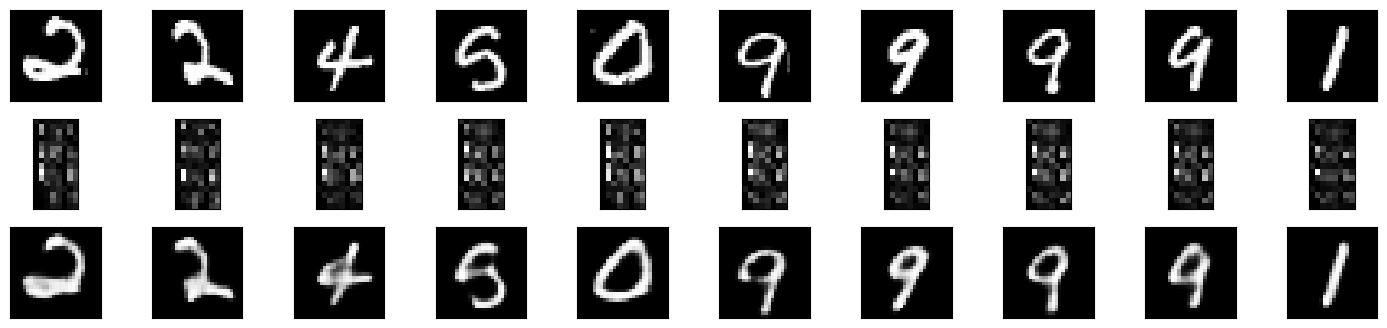

In [17]:
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(test_x[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


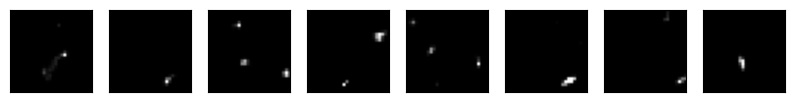

In [12]:
plot_digits(decoder.predict(np.random.rand(8, 4, 4, 8) * 5))

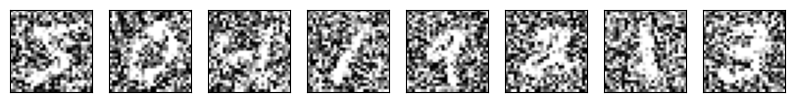

In [18]:
def add_noise(x):
    return np.clip(x + 0.5 + 0.5*np.random.randn(*x.shape), 0, 1)

train_x_noise = add_noise(train_x)
test_x_noise = add_noise(test_x)

plot_digits(train_x_noise[:8])

In [14]:
NUM_EPOCHS = 2
BATCH_SIZE = 128

autoencoder.fit(train_x_noise, train_x,
                epochs=NUM_EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True,
                validation_data=(test_x_noise, test_x))

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 126s 269ms/step - loss: 0.0424 - val_loss: 0.0295
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 126s 269ms/step - loss: 0.0305 - val_loss: 0.0296


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


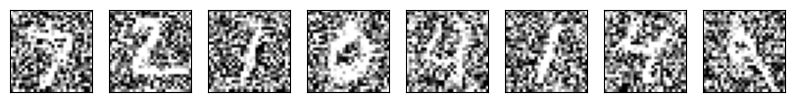

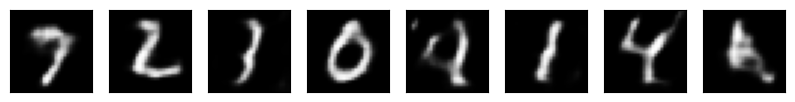

In [19]:
text_x_pred = autoencoder.predict(test_x_noise[0:8])

plot_digits(test_x_noise[0:8])
plot_digits(text_x_pred)

Видео № 2

Протестируем обученный автоэнкодер, вызывая метод predict и используя новые картинки из тестовой выборки.
Рассмотрим, как по отдельности работают Encoder и Decoder. Decoder из полученных в  Encoder'е кодов восстанавливает картинки. Decoder работает здесь как генератор, выдавая картинки по признаковым представлениям.
Пробуем подать в Decoder случайные значения.
Denoising Autoencoder 

Рассмотрим частный случай — Denoising Autoencoder. Смысл его в том, что на входе подаётся зашумлённая картинка, а задача Denoising Autoencoder'а восстановить исходную картинку.

